## Training - reduced_possible_words.txt
## Testing - prev_words_chr.txt

### Letter Frequency in Each Dataset

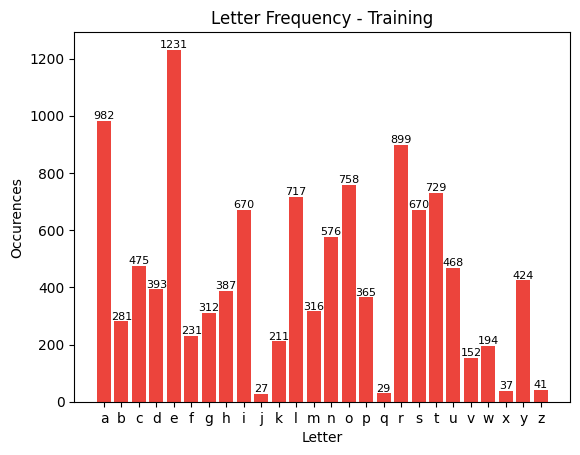

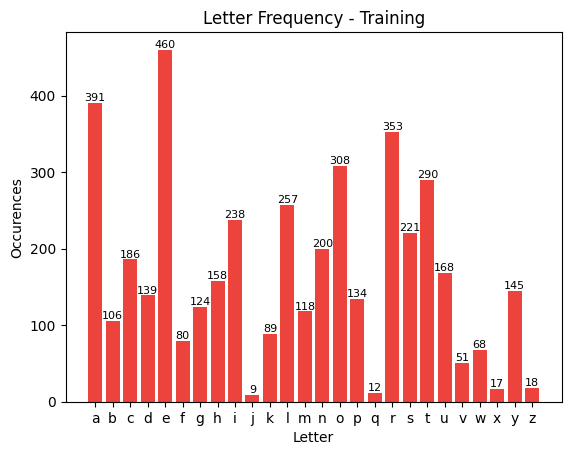

In [22]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

train_file = open('../Dataset/reduced_possible_words.txt', 'r')
test_file = open('../Dataset/prev_words_chr.txt', 'r')
files = [train_file, test_file]
counter = 0

for file in files:
    # Create alphabet
    alphabet = []
    c = "a"
    for i in range(26):
        alphabet.append(c)
        c = chr(ord(c) + 1)

    # Create dictionary
    alph_dict = {letter: 0 for letter in alphabet}
    for word in file:
        for letter in word:
            if letter != '\n':
                alph_dict[letter] += 1

    letters = list(alph_dict.keys())
    vals = list(alph_dict.values())
    if (counter == 0):
        plt.title('Letter Frequency - Training')
    else:
        plt.title('Letter Frequency - Testing')

    plt.ylabel('Occurences')
    plt.xlabel('Letter')
    bars = plt.bar(letters, vals, color = "#ec443c")

    for i, bar in enumerate(bars):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=8)

    plt.show()
    file.close()

### Compare vowel, consonant appearances in words

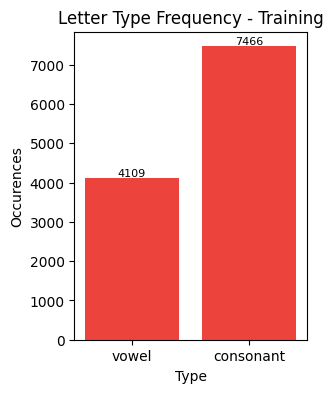

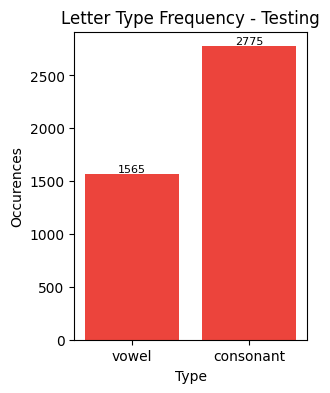

In [23]:
train_file = open('../Dataset/reduced_possible_words.txt', 'r')
test_file = open('../Dataset/prev_words_chr.txt', 'r')
files = [train_file, test_file]

choices = ['vowel', 'consonant']
vowels = ['a', 'e', 'i', 'o', 'u']

for file in files:
    count = {entry: 0 for entry in choices}
    for word in file:
        for letter in word:
            if letter in vowels:
                count['vowel'] += 1
            elif letter != '\n':
                count['consonant'] += 1

    types = list(count.keys())
    vals = list(count.values())
    plt.figure(figsize=(3, 4))
    if (counter == 0):
        plt.title('Letter Type Frequency - Training')
        counter += 1
    else:
        plt.title('Letter Type Frequency - Testing')
        counter = 0
        
    plt.ylabel('Occurences')
    plt.xlabel('Type')
    bars = plt.bar(types, vals, color="#ec443c")

    # Add labels on top of each bar
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=8)

    file.close()

### Number of Vowels in Wordle Answers

In [24]:
train_file = open('../Dataset/reduced_possible_words.txt', 'r')
test_file = open('../Dataset/prev_words_chr.txt', 'r')
files = [train_file, test_file]

for file in files:
    vowels = ['a', 'e', 'i', 'o', 'u']
    vowel_arr = [0, 0, 0, 0, 0, 0]
    for word in file:
        word = word[:-1]
        count = 0
        for letter in word:
            if letter in vowels:
                count += 1
        vowel_arr[count] += 1

    data = {'Count': vowel_arr, 'Number of Vowels': range(6)}
    df = pd.DataFrame(data)
    df = df[df['Count'] > 0]

    # Create a pie chart using Plotly Express
    if (counter == 0):
        fig = px.pie(df, names='Number of Vowels', values='Count', title='Number of Vowels in Wordle Answers - Training')
        counter += 1
    else:
        fig = px.pie(df, names='Number of Vowels', values='Count', title='Number of Vowels in Wordle Answers - Testing')
        counter = 0

    fig.update_layout(width=400, height=400)
    fig.update_traces(sort=False)
    fig.update_layout(font=dict(family="Arial", color = "black")) 

    fig.show()
    file.close()


### Heatmap of letters for each word position

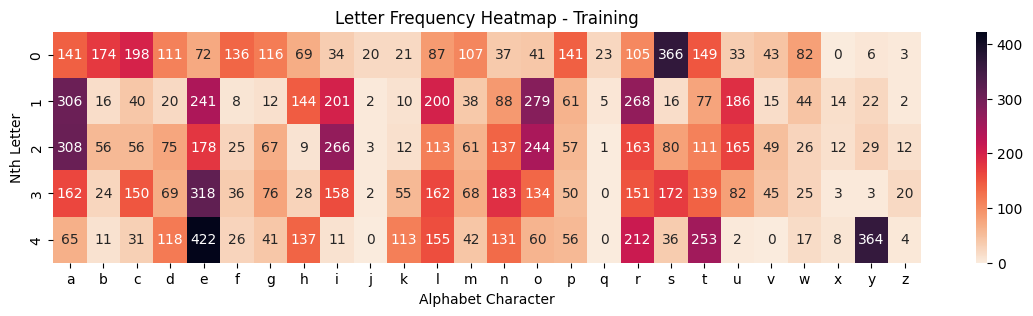

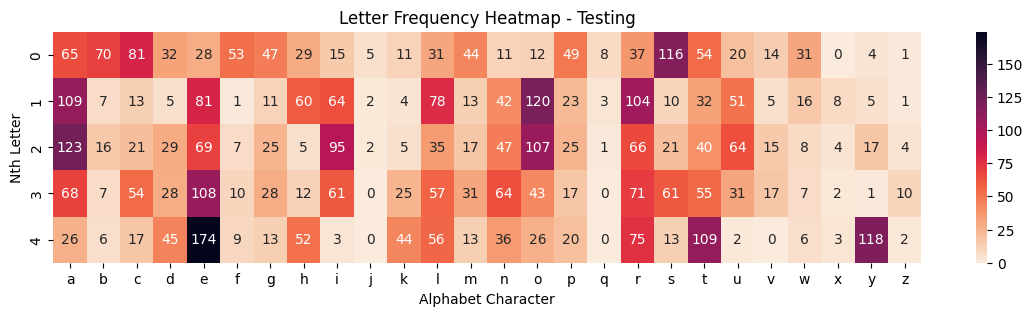

In [25]:
train_file = open('../Dataset/reduced_possible_words.txt', 'r')
test_file = open('../Dataset/prev_words_chr.txt', 'r')
files = [train_file, test_file]

for file in files:
    alphabet = []
    c = "a"
    for i in range(26):
        alphabet.append(c)
        c = chr(ord(c) + 1)

    first = {letter: 0 for letter in alphabet}
    second = {letter: 0 for letter in alphabet}
    third = {letter: 0 for letter in alphabet}
    fourth = {letter: 0 for letter in alphabet}
    fifth = {letter: 0 for letter in alphabet}

    # Create dictionary
    for word in file:
        first[word[0]] += 1
        second[word[1]] += 1
        third[word[2]] += 1
        fourth[word[3]] += 1
        fifth[word[4]] += 1

    # Heatmap array
    data = []
    for i in [first, second, third, fourth, fifth]:
        data.append(list(i.values()))

    plt.figure(figsize=(14, 3))
    if (counter == 0):
        plt.title('Letter Frequency Heatmap - Training')
        counter += 1
    else:
        plt.title('Letter Frequency Heatmap - Testing')
        counter = 0

    ax = sns.heatmap(data, xticklabels=alphabet, annot=True, fmt='g', cmap='rocket_r')
    ax.set(xlabel = "Alphabet Character", ylabel = "Nth Letter")
    plt.show()
    file.close()
